In [ ]:
import casadi as ca
import numpy as np

In [ ]:
a = ca.SX.sym('a', 2, 2)
b = ca.SX.sym('b', 2, 2)

pippo = ca.blockcat([[a, b], [ca.transpose(b), a]])

print(pippo)
print(pippo.shape)

In [ ]:
times = np.array([0.100, 0.297, 0.433, 0.642, 0.767, 1.0])
sum_of_groups = [np.sum(times[i:i+3]) for i in range(0, len(times), 3)]
print(sum_of_groups)

durations = np.diff(times)

durations = np.insert(durations, 0, times[0])

# print(durations)

pippo = [2]
print(pippo[0])

In [ ]:
from scipy.linalg import solve_continuous_are

A = np.array([[-1, 0], [1, 2]])
B = np.array([[1], [1]])

Q = 1000 * np.eye(2)
R = 1

P = solve_continuous_are(A, B, Q, R)

print(P)



/tmp/ipykernel_17759/1982886469.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(np.log10(np.abs(constraints_value_ms)), label='DMS', linestyle="--")


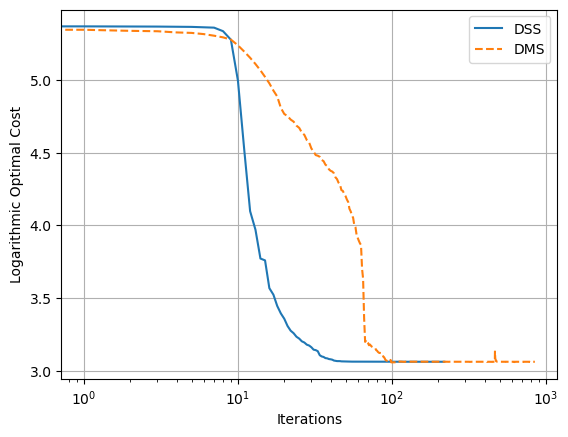

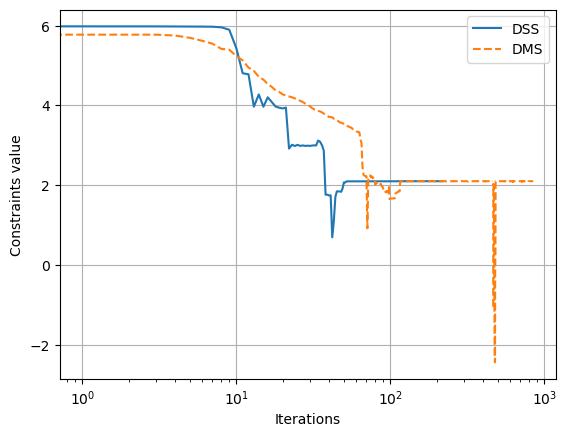

In [18]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Load data from a .mat file
data = scipy.io.loadmat('comparison_results.mat')

# Extract the relevant variables
optimal_costs = data['optimal_costs'][0] 
optimal_constraints = data['optimal_constraints'][0]
iter_array = data['iter_array'][0]  # Extract the array from the nested structure

constraints_value_ss = optimal_constraints[0].flatten()
constraints_value_ms = optimal_constraints[1].flatten()

# Plot the optimal costs function value
plt.figure()

plt.semilogx(np.log10(optimal_costs[0].flatten()), label='DSS', linestyle="-")
plt.semilogx(np.log10(optimal_costs[1].flatten()), label='DMS', linestyle="--")
plt.xlabel('Iterations')
plt.ylabel('Logarithmic Optimal Cost')
plt.grid()
plt.legend()

plt.figure()
plt.semilogx(np.log10(np.abs(constraints_value_ss)), label='DSS', linestyle="-")
plt.semilogx(np.log10(np.abs(constraints_value_ms)), label='DMS', linestyle="--")
plt.xlabel('Iterations')
plt.ylabel('Constraints value')
plt.grid()
plt.legend()

plt.show()